# EndotyPy package usage

In [1]:
import EndotypY as edy #type: ignore
import pickle
import networkx as nx


we just create a named object of our one facade class Endotyper

In [2]:
endo = edy.Endotyper()

# read in a graph from a file
path_ppi = 'monocyte.tsv'
#path_ppi = 'ppi.txt'
endo.import_network(path_ppi)

#path_seed = 'ibd_risk_genes_F.txt'
path_seed = 'ibd_risk_genes_mini.txt'
#read in a seed set from a file
#path_seed = 'example_seeds.txt'
endo.import_seeds(path_seed)

endo


network imported successfully
> Network contains 2866 nodes and 18725 edges

> Loaded 10 seed nodes from file: ibd_risk_genes_mini.txt
seeds imported successfully


In [3]:
#prepare RWR
endo.prepare_rwr(r=0.8)

Preparing RWR...
Inverting the matrix takes time, please be patient...
RWR matrix prepared successfully


Running RWR for seed genes: 100%|██████████| 10/10 [00:00<00:00, 109.14it/s]


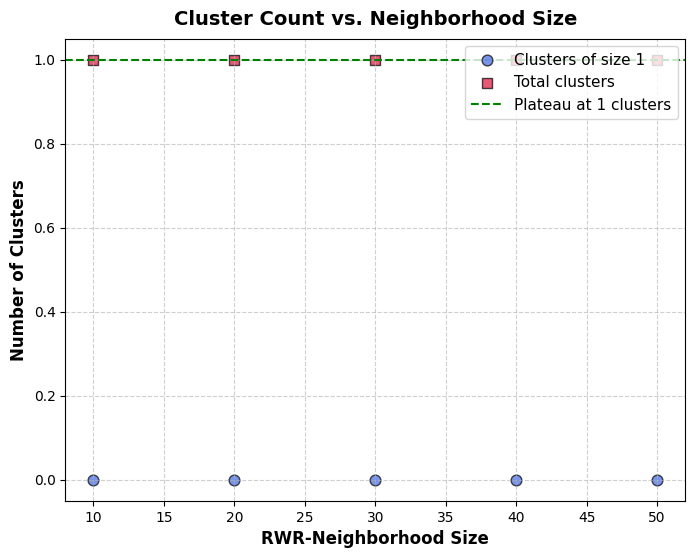

1 Seed clusters identified


{'cluster_seed_1': ['NOD2', 'LRRK2', 'CARD9']}

In [14]:
#explore the seed clusters

##!!!! SEED CLUSTERING IS NOT MAKING SENSE YET
endo.explore_seed_clusters(scaling=True, k=50)

In [5]:
endo.extract_disease_module(seed_cluster_id = None, scaling=True, k=200)

No seed cluster ID provided, using all seeds
Connected module extracted with 203 nodes and 790 edges


In [6]:
endo.define_local_neighborhood(scaling=True, neighbor_percentage=1)

Running RWR for seed genes: 100%|██████████| 203/203 [00:00<00:00, 232.27it/s]


In [7]:
endo.annotate_local_neighborhood(enrichr_lib='GO_Biological_Process_2023',
                                 organism='Human',
                                 sig_threshold=0.05)

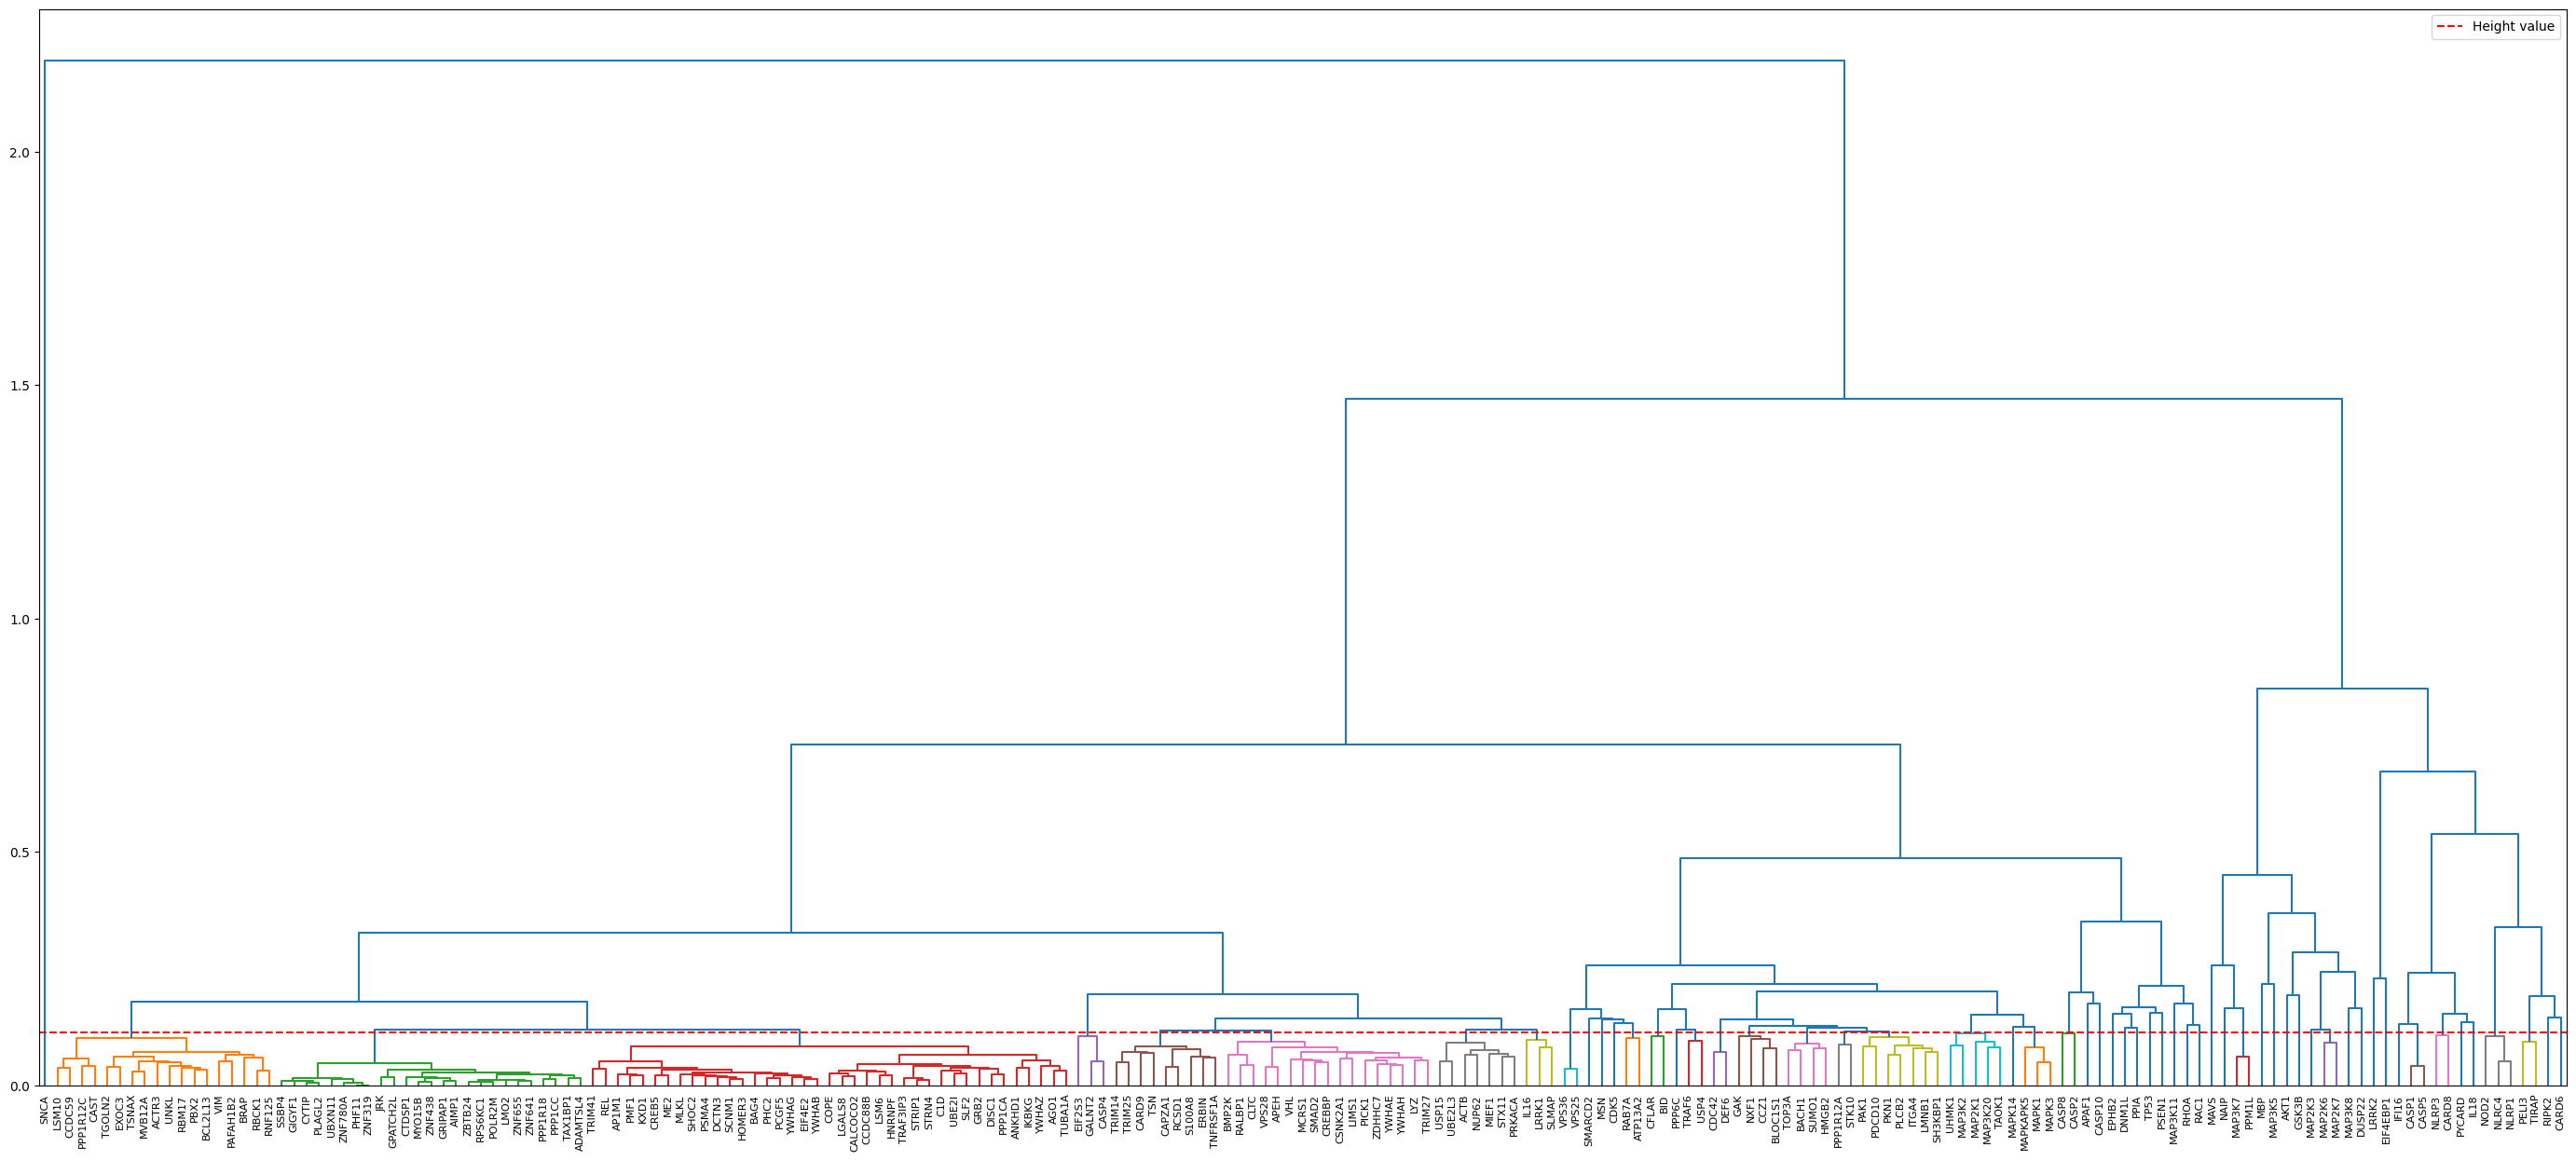

Iteration 1: 32 unassigned genes found.
Cluster numbers: 58


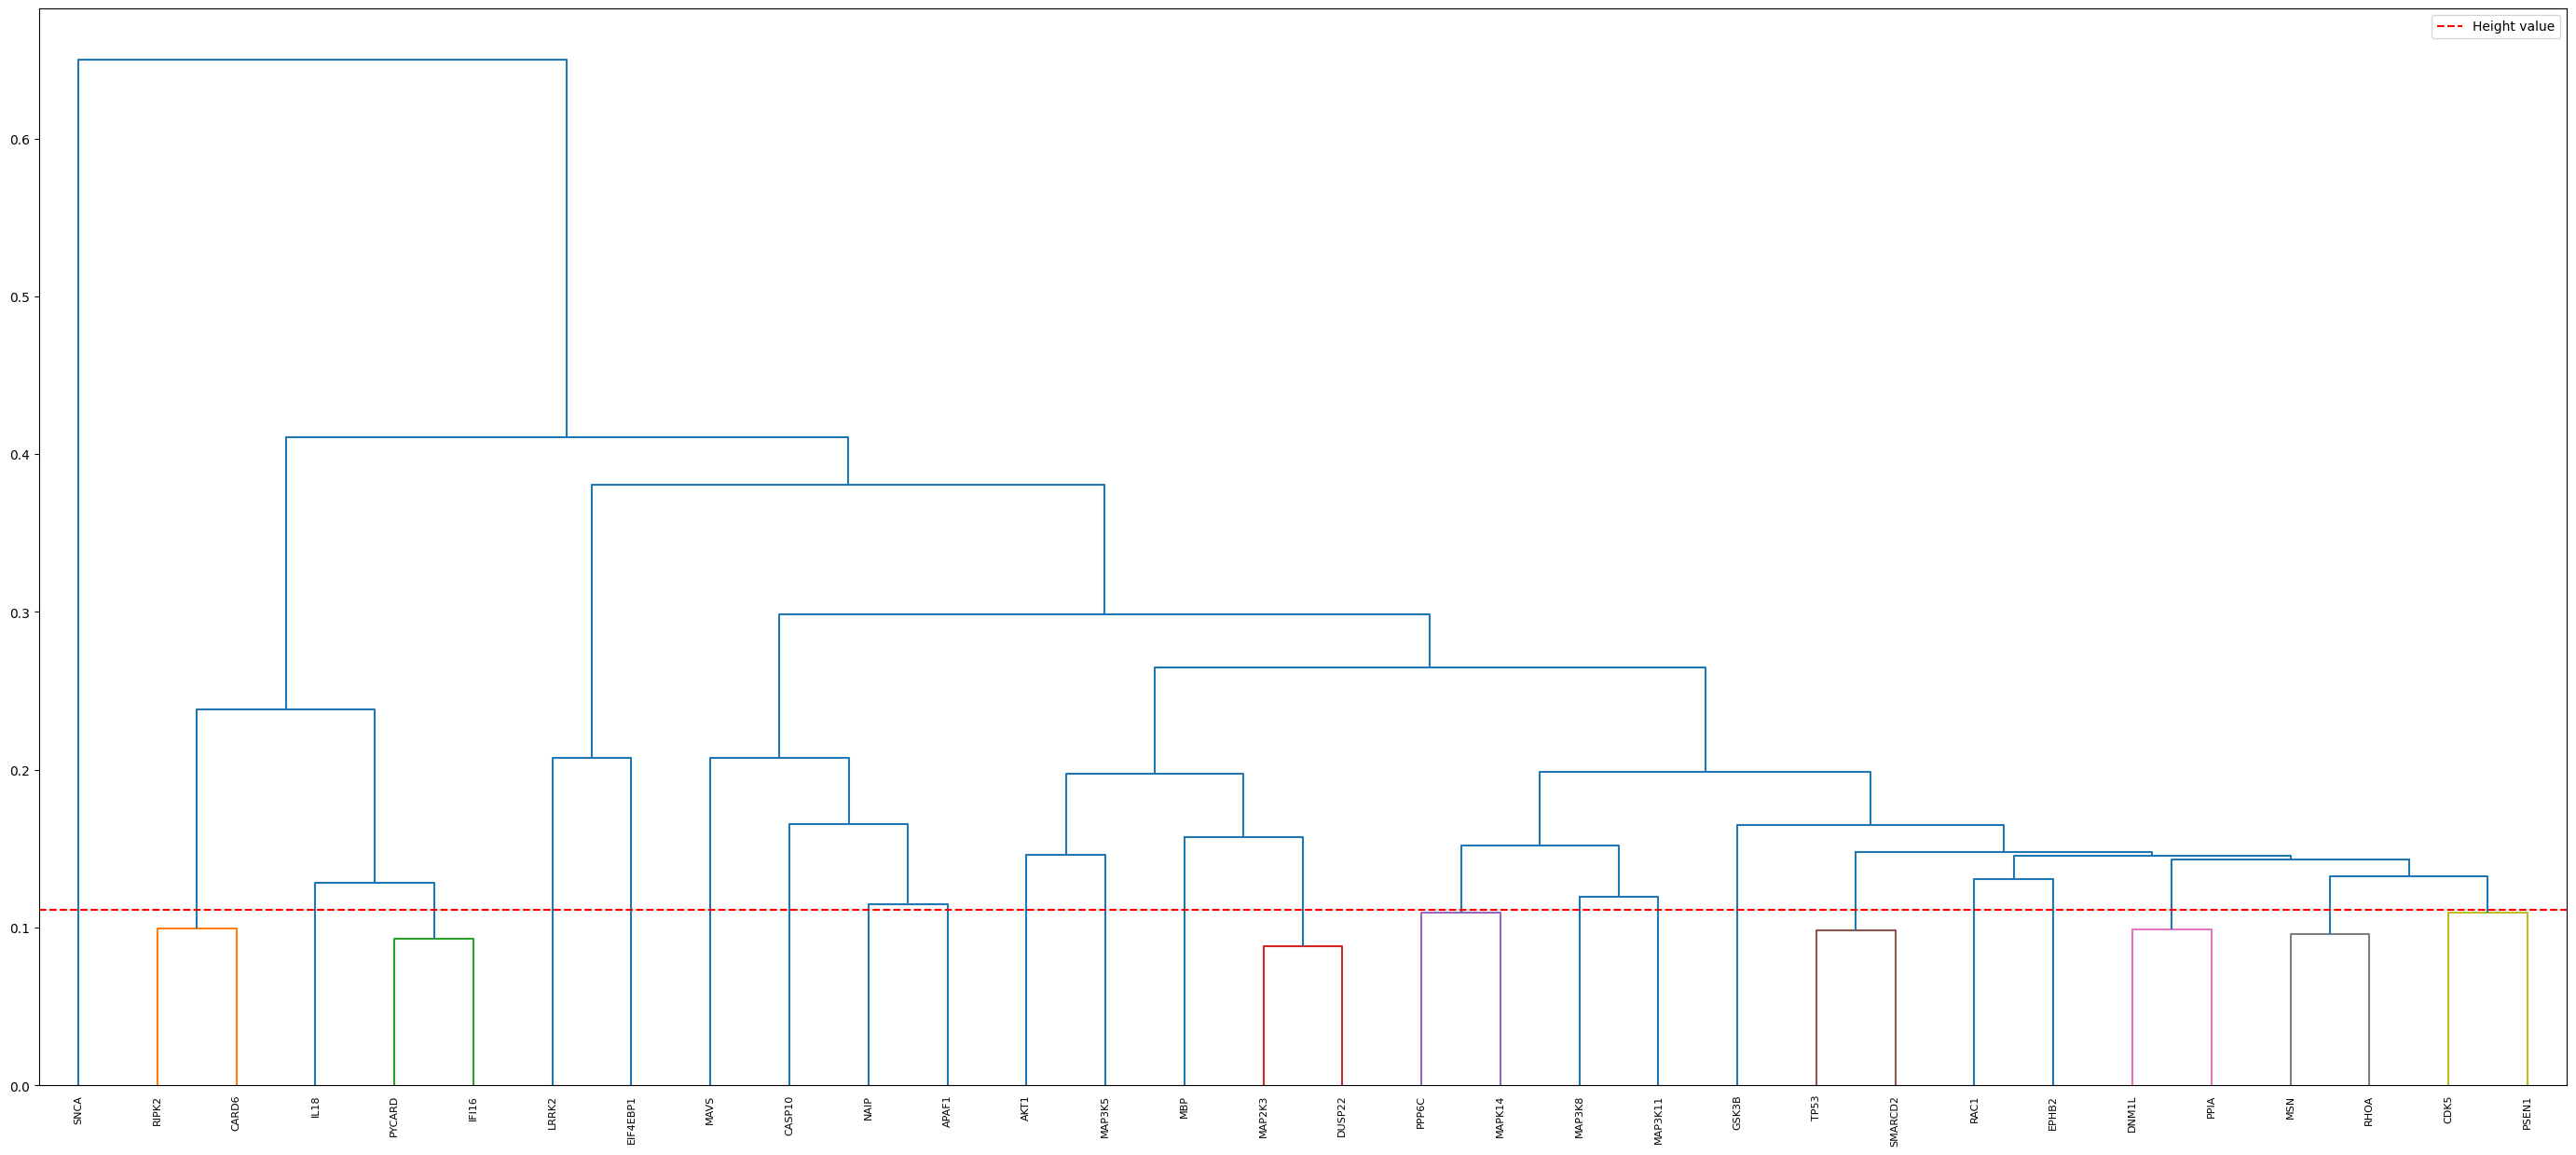

Iteration 1: 16 unassigned genes found.
Cluster numbers: 24


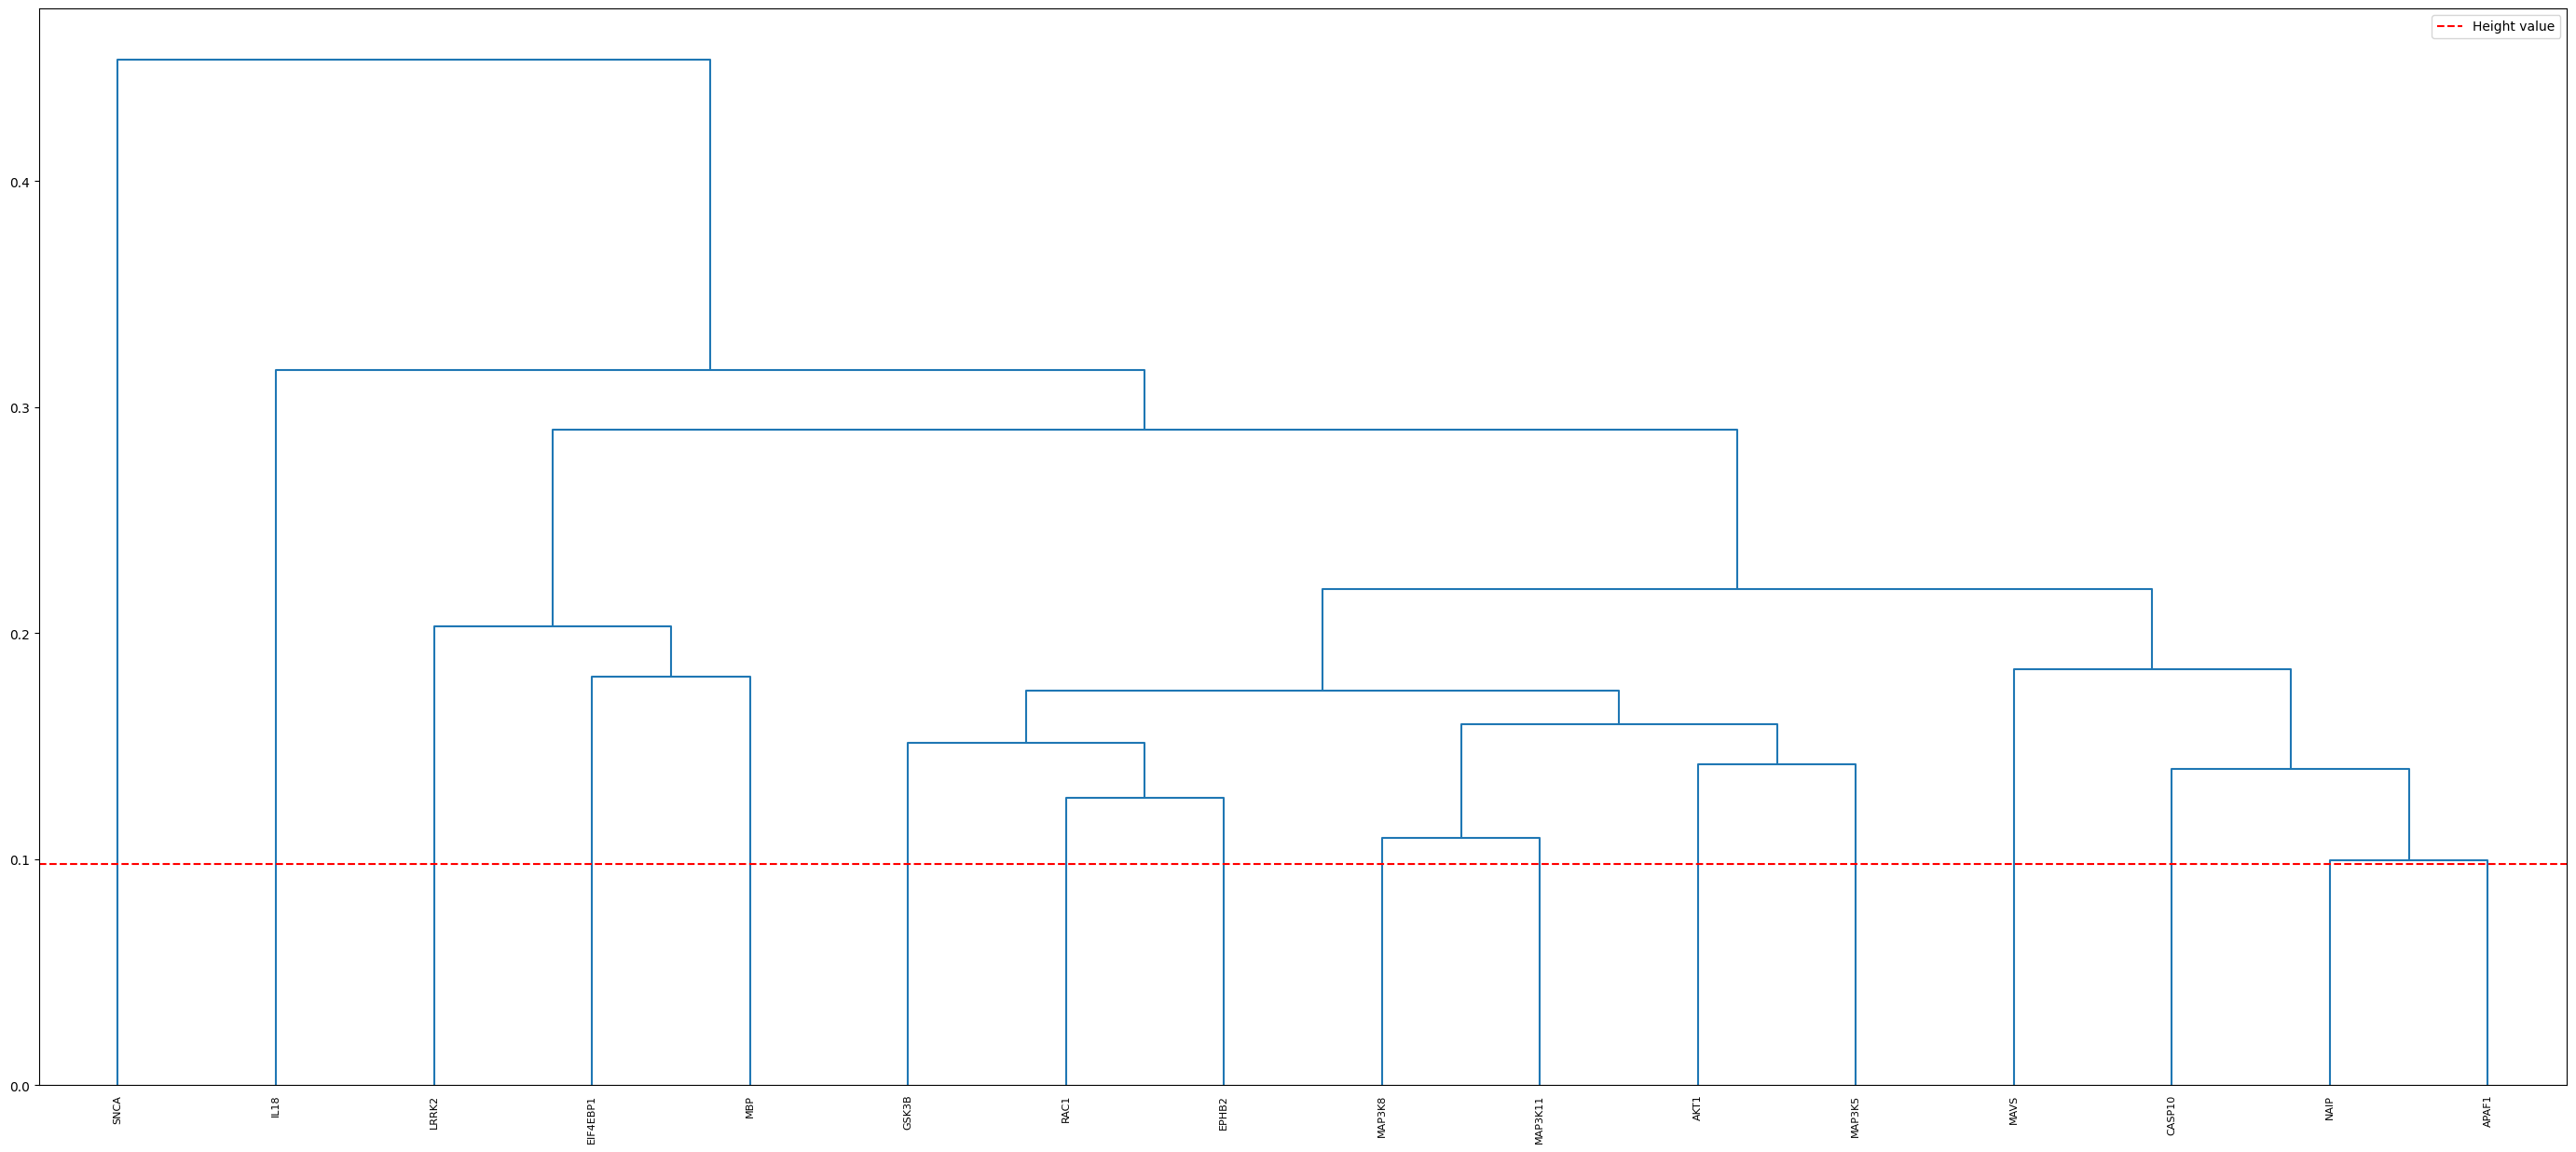

Iteration 2: 16 unassigned genes found.
Cluster numbers: 16
Found no significant clustering at iteration 3, finishing process.


In [8]:
endo.define_endotypes()

No cluster ID provided, defaulting to first cluster


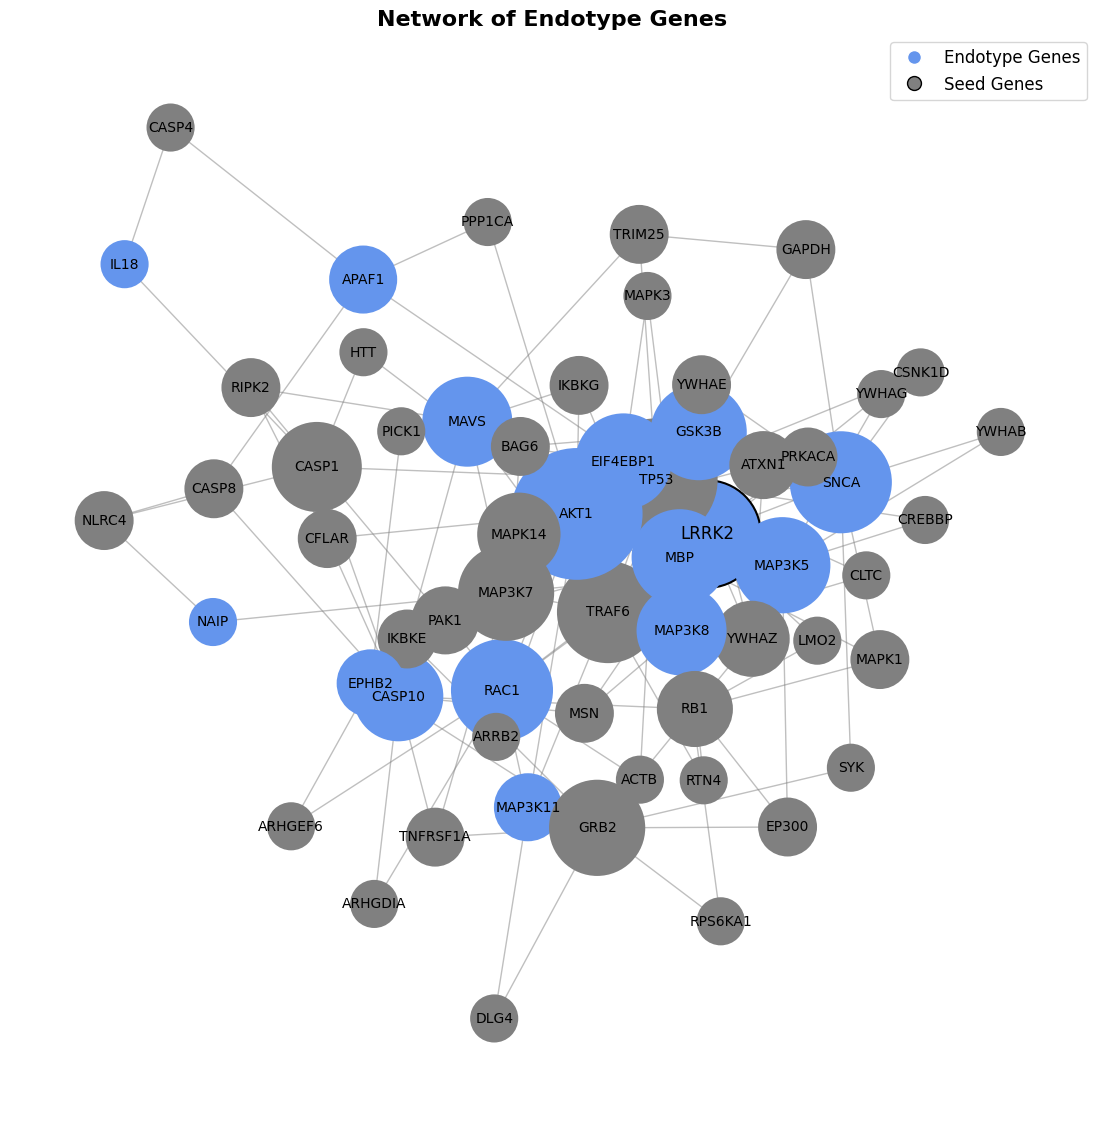

In [9]:
endo.plot_endotype(iteration=3, node_size='degree', path_length=3)

No cluster ID provided, defaulting to first cluster


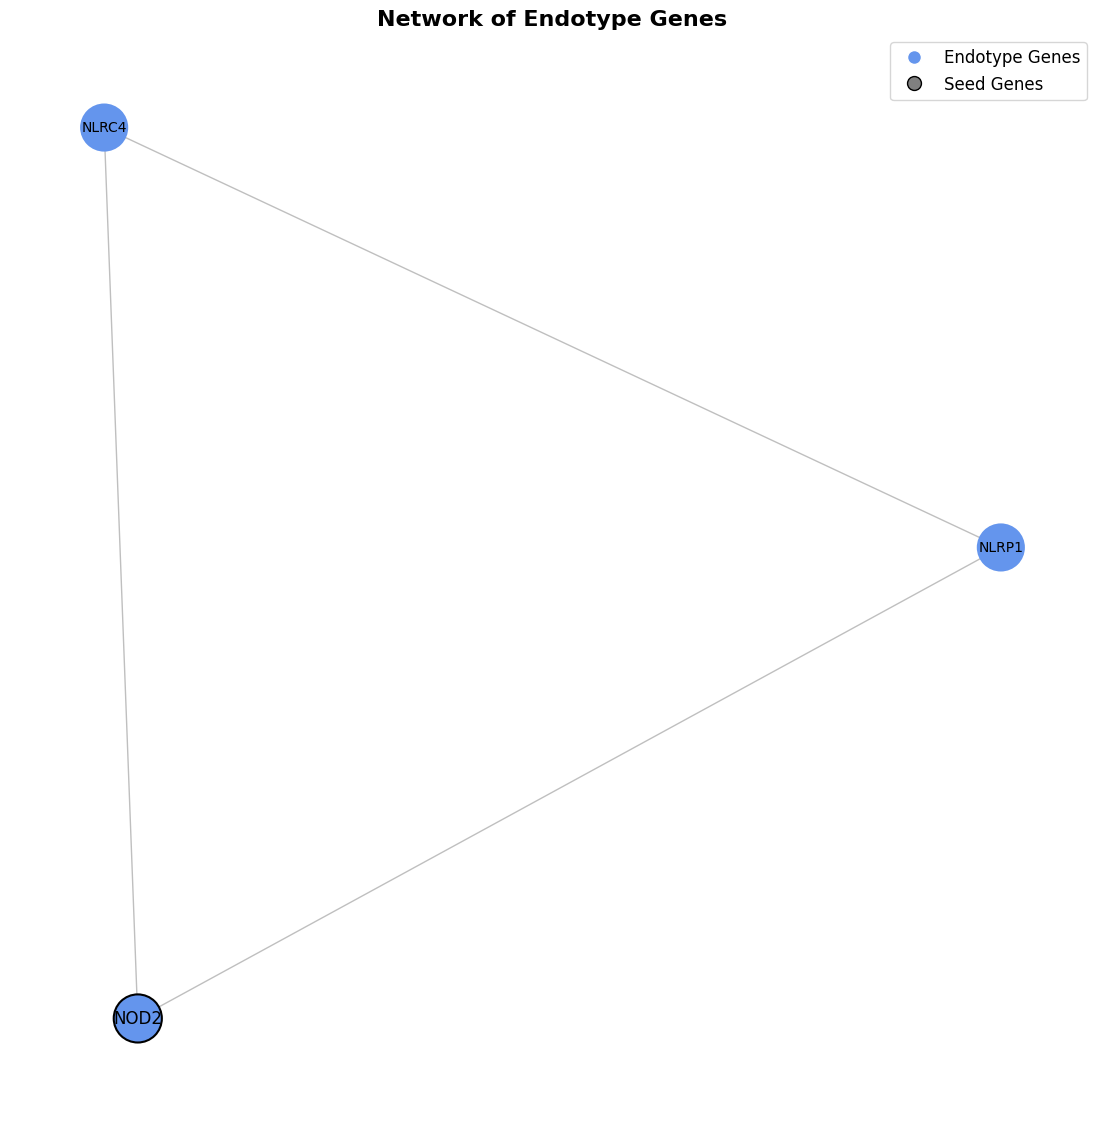

In [10]:
endo.plot_endotype(iteration=1, node_size='degree', path_length=3)

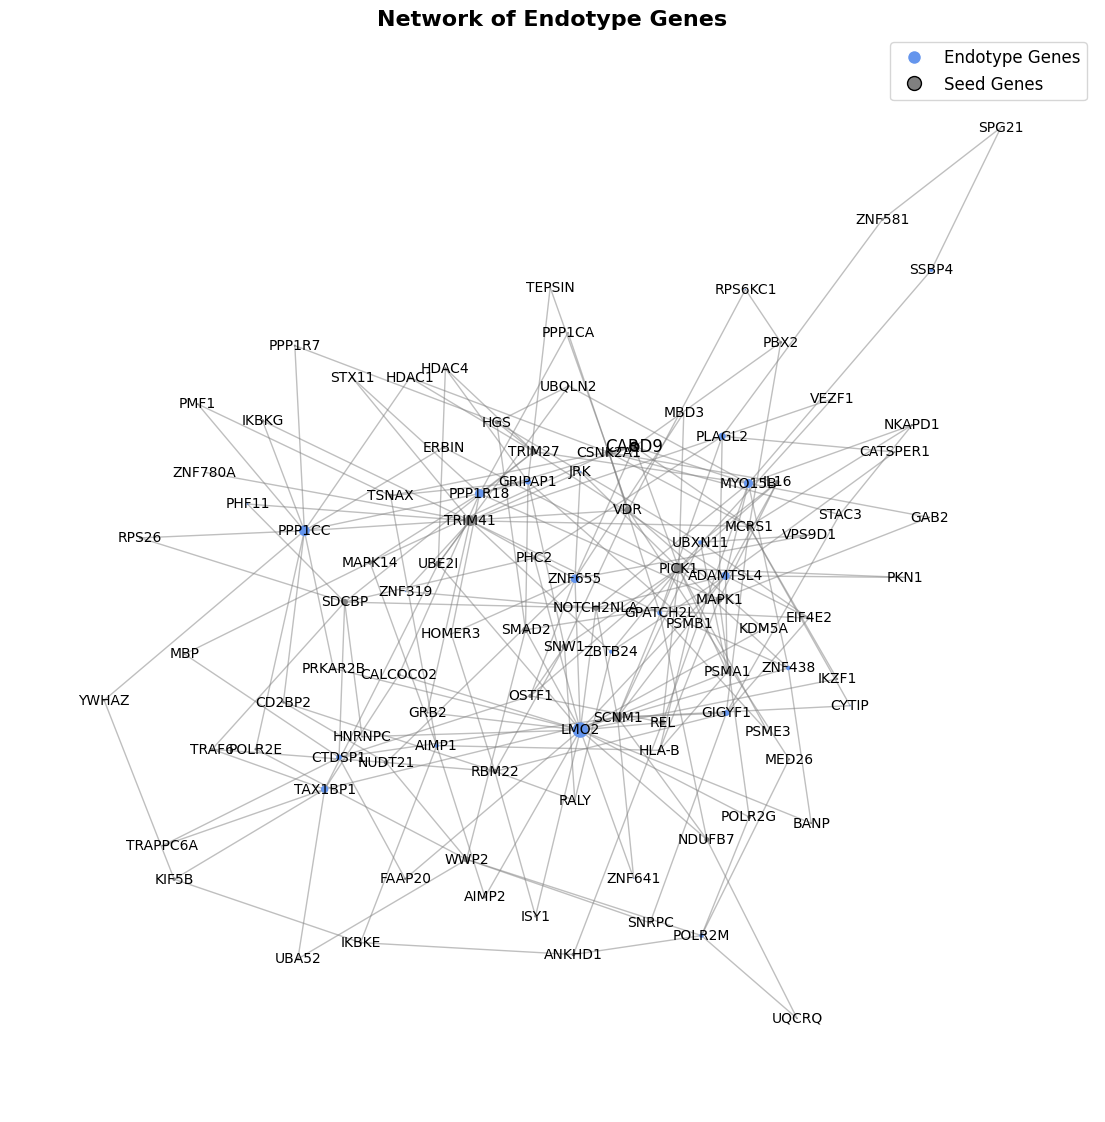

In [15]:
endo.plot_endotype(iteration=1, cluster_id=2, node_size='betweenness', path_length=3)

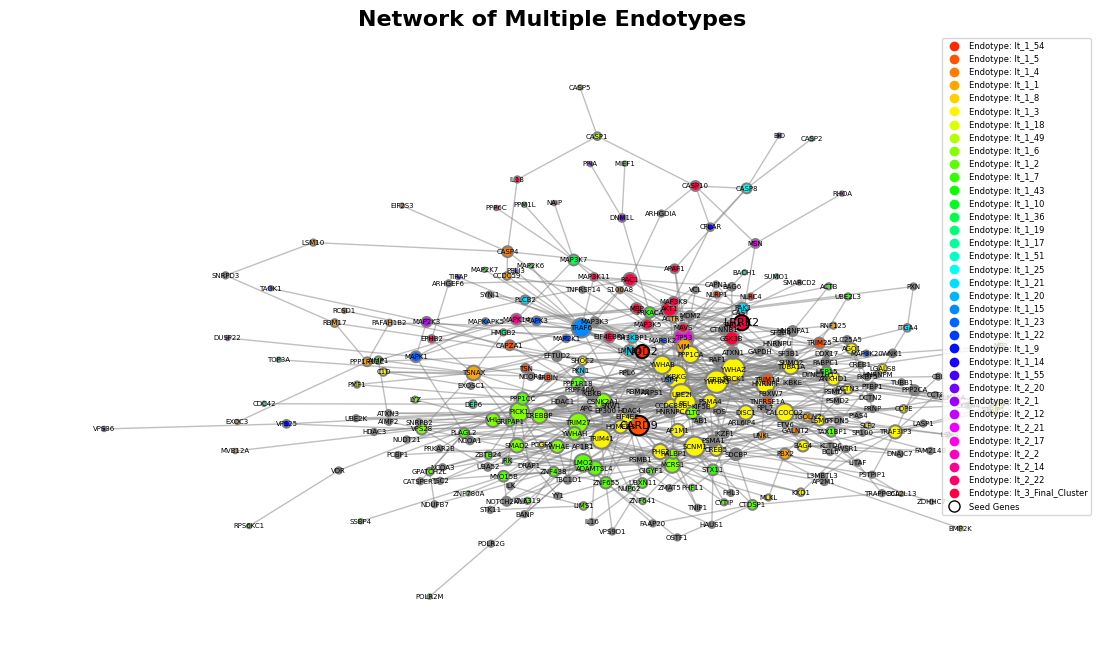

In [16]:
endo.plot_multiple_endotypes(node_size='degree', path_length=2)

In [13]:
class_attributes = vars(endo).keys()

for attr in class_attributes:
    print(attr)

network
seeds
rwr_matrix
scaling_matrix
idx_ensembl
disease_module
connected_subgraph
seed_clusters
expanded_neighborhoods
neighborhood_annotation
feature_matrix
endotypes
